# Capstone Project - Forest Cover Type Identification using tabular data

Our Earth is an unique planet in the solar system holding the key to sustain Life. Even now many parts of the oceans, and forests remain unexplored. Several species are discovered periodically in remote forests across the globe. Under further genetic studies it is revealed that we humans do posses some characteristics of the DNA of the mammals!. Exploration of such  remote regions can provide answers for many unanswered questions regarding origin of life, evolution, and life in unpolluted environments. 
    
However such explorations are costly and even dangerous for humans. Aerial surveillance have improved much during these last decades. These technological improvements can assist in human explorations by capturing images of unexplored regions reducing cost and human effort. But most forests are dense with vegetation and such aerial surveillance can provide only the top view. We can then use the surveillance data(tabular data) to predict and restrict the search space for human explorations. From these explorations an extrapolation can be done about missing species in similar areas, thus reducing the search space further. 
        

# Project Plan

This project aims to use surveillance data(tabular) with cartographic information(land structures) to train models that can predict and identify the forest cover types. The project also aims to create a classification model with more than 90\% accuracy which can classify the forest cover type.
    
The performance of the model can be evaluated by calculating the prediction accuracy. For testing, 20\% of the total data set will be used which is not used to train the model. All classification models will be trained with 80\% of the data. This huge amount of data used to train the models can increase the prediction accuracy over the unseen data.

# Evaluation Plan

Performance of various classifiers can be ranked and finally we can chose highest ranked classifier using all of the following properties,
* Precision
* Recall
* Accuracy
* F1-score

# Data Source
UCI Machine Learning Repository
The data used in the project can be downloaded from following url,
https://archive.ics.uci.edu/ml/datasets/Covertype

# 1 Analysis

## 1.1 Data Exploration

If a dataset is present, features and calculated statistics relevant to the problem have been reported and discussed, along with a sampling of the data. In lieu of a dataset, a thorough description of the input space or input data has been made. Abnormalities or characteristics about the data or input that need to be addressed have been identified.

In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data from the local folder 
os.chdir('data/')

In [ ]:
# Structure of raw tabular data 
"""
Name                                     Data Type    Measurement                       Description

Elevation                            quantitative    meters                       Elevation in meters
Aspect                               quantitative    azimuth                      Aspect in degrees azimuth
Slope                                quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology     quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology       quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways      quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                        quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                       quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                        quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points   quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)   qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)        qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                 integer         1 to 7                       Forest Cover Type designation
"""

In [3]:
# Reading the data from the input file
data = pd.read_csv('covtype.data', sep=",", header = None)
# Assigning column names to the dataframe data
data.columns = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 'vertical_distance_to_hydrology',
                'horizontal_distance_to_road_ways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
                'horizontal_distance_to_fire_points', 'wilderness_area_1', 'wilderness_area_2',
                'wilderness_area_3', 'wilderness_area_4',
                'soil_type_1', 'soil_type_2', 'soil_type_3', 'soil_type_4', 'soil_type_5', 
                'soil_type_6', 'soil_type_7', 'soil_type_8', 'soil_type_9', 'soil_type_10', 
                'soil_type_11', 'soil_type_12', 'soil_type_13', 'soil_type_14', 'soil_type_15', 
                'soil_type_16', 'soil_type_17', 'soil_type_18', 'soil_type_19', 'soil_type_20', 
                'soil_type_21', 'soil_type_22', 'soil_type_23', 'soil_type_24', 'soil_type_25', 
                'soil_type_26', 'soil_type_27', 'soil_type_28', 'soil_type_29', 'soil_type_30', 
                'soil_type_31', 'soil_type_32', 'soil_type_33', 'soil_type_34', 'soil_type_35', 
                'soil_type_36', 'soil_type_37', 'soil_type_38', 'soil_type_39', 'soil_type_40',
                'cover_type']
# Extracting all the features from the dataframe
feature_cols = list(data.columns[:-1])
# Extracting the target attribute from the dataframe
target_col = data.columns[-1]
# Assigning the features into X_all variable
X_all = data[feature_cols]
# Assigning the target attribute into y_all variable
y_all = data[target_col]
# print "\nFeature values:-"
# Printing the first row in X_all and y_all attribute
print X_all.head(1)
print y_all.head(1)

   elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   

   vertical_distance_to_hydrology  horizontal_distance_to_road_ways  \
0                               0                               510   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            221             232            148   

   horizontal_distance_to_fire_points      ...       soil_type_31  \
0                                6279      ...                  0   

   soil_type_32  soil_type_33  soil_type_34  soil_type_35  soil_type_36  \
0             0             0             0             0             0   

   soil_type_37  soil_type_38  soil_type_39  soil_type_40  
0             0             0             0             0  

[1 rows x 54 columns]
0    5
Name: cover_type, dtype: int64


In [5]:
# Information about the features data
print X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
elevation                             581012 non-null int64
aspect                                581012 non-null int64
slope                                 581012 non-null int64
horizontal_distance_to_hydrology      581012 non-null int64
vertical_distance_to_hydrology        581012 non-null int64
horizontal_distance_to_road_ways      581012 non-null int64
hillshade_9am                         581012 non-null int64
hillshade_noon                        581012 non-null int64
hillshade_3pm                         581012 non-null int64
horizontal_distance_to_fire_points    581012 non-null int64
wilderness_area_1                     581012 non-null int64
wilderness_area_2                     581012 non-null int64
wilderness_area_3                     581012 non-null int64
wilderness_area_4                     581012 non-null int64
soil_type_1                           581012 non-

In [6]:
# Describing about target variable
display(y_all.describe())

count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: cover_type, dtype: float64

In [7]:
# describing the features upto 5th column, 
display(X_all.ix[:,:5].describe())
# dislaying the features from 6th column to 10th column
display(X_all.ix[:,5:10].describe())
# NOTE: wilderness_area and soil_type are binary valued columns, so they are not described here

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855
std,279.984734,111.913721,7.488242,212.549356,58.295232
min,1859.000000,0.000000,0.000000,0.000000,-173.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000


,horizontal_distance_to_road_ways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [10]:
# Counting the occurences of each target class 
print data.groupby('cover_type').size().sort_values(ascending=False)

cover_type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
dtype: int64


### Finding outliers in the data

In [8]:
# Reference https://en.wikipedia.org/wiki/Outlier

cols = data.columns  # Reads the column names from the dataframe
# A dat point is an outlier if it differs from the attributes standard deviation times 3
temp_calc = data[cols].apply(lambda x: np.abs(x-x.mean())/x.std() > 3.0)
not_outliers = temp_calc[temp_calc.apply(pd.Series.value_counts, axis=1)[0] > 6.0].index.tolist()
print "  * Number of outliers (deviants in more columns) = %d" %(len(data)-len(not_outliers))

  * Number of outliers (deviants in more columns) = 0


In [14]:
# Also checking for any attribute with standard deviation zero
# Result : There are no columns with zero standard deviation. This proves that
# all the columns have meaningful information to be considered for the classification algorithms

def check_for_zero_sd(temp_data, temp_cols):
    for t_col in temp_cols:
        c_sd = temp_data[t_col].std()
        if c_sd == 0:
            print t_col          

check_for_zero_sd(data, data.columns)

### Finding correlations in the data

Correlation among attributes can help in understanding their relationship better. Further more this relationship can help us in training the classification algorithms better. Only attributes with continuous calues can be used for correlation. So in our data 'wilderness_area' and 'soil_type' attributes cannot be used for correlations calculation. 

In [18]:
correlated_attributes = []  # a list to store the correlated attributes
column_index_limit = 10 # columns until all attrubytes have categorical data

temp_data=data.iloc[:,:column_index_limit] # extracting the categorical data from the dataframe
cols=temp_data.columns # extracting all the column names
data_correlated_values = temp_data.corr() # correlating all the extracted columns

for i in range(0, column_index_limit): # iterating over the rows
    for j in range(i + 1, column_index_limit): # iterating over the columns but with one less column than i
        # following condition checks for all the correlated values which are > than 0,5 score and < 1.0
        condition_1 = (data_correlated_values.iloc[i,j] < 1.0) and (data_correlated_values.iloc[i,j] >= 0.50) 
        # following condition checks for all the correlated values which are < 0.0 and less than -0.5
        condition_2 = (data_correlated_values.iloc[i,j] < 0.0) and (data_correlated_values.iloc[i,j] <= -0.50)
        # we consider both positive and negative values because +ve indicates direct correlation while 
        #    -ve score indicates an indirect correlation
        if condition_1 or condition_2:
            # if the condition is true add it to the list
            correlated_attributes.append([data_correlated_values.iloc[i,j], i, j]) 

for val, i, j in sorted(correlated_attributes, key=lambda x: -abs(x[0])):
    # iterate over the loist to print the columsn and the score
    print ("%s and %s = %.2f" % (cols[i], cols[j], val))
    # the printed values are worth considering specially in classifier construyctions

hillshade_9am and hillshade_3pm = -0.78
aspect and hillshade_3pm = 0.65
horizontal_distance_to_hydrology and vertical_distance_to_hydrology = 0.61
hillshade_noon and hillshade_3pm = 0.59
aspect and hillshade_9am = -0.58
slope and hillshade_noon = -0.53


## 1.2 Exploratory Visualization

In this section, we are going to visualize the data to identify the underlying relationships in the data. 

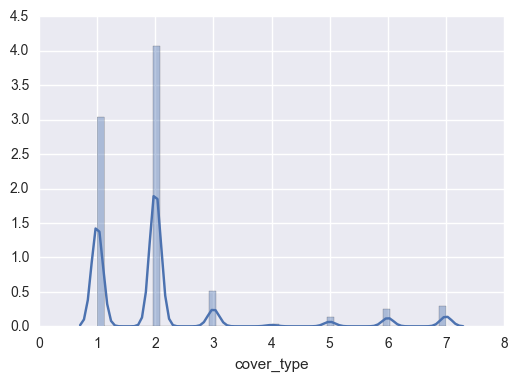

In [14]:
# Listing the count of the different categories of the target variable
_= sns.distplot(data.cover_type)

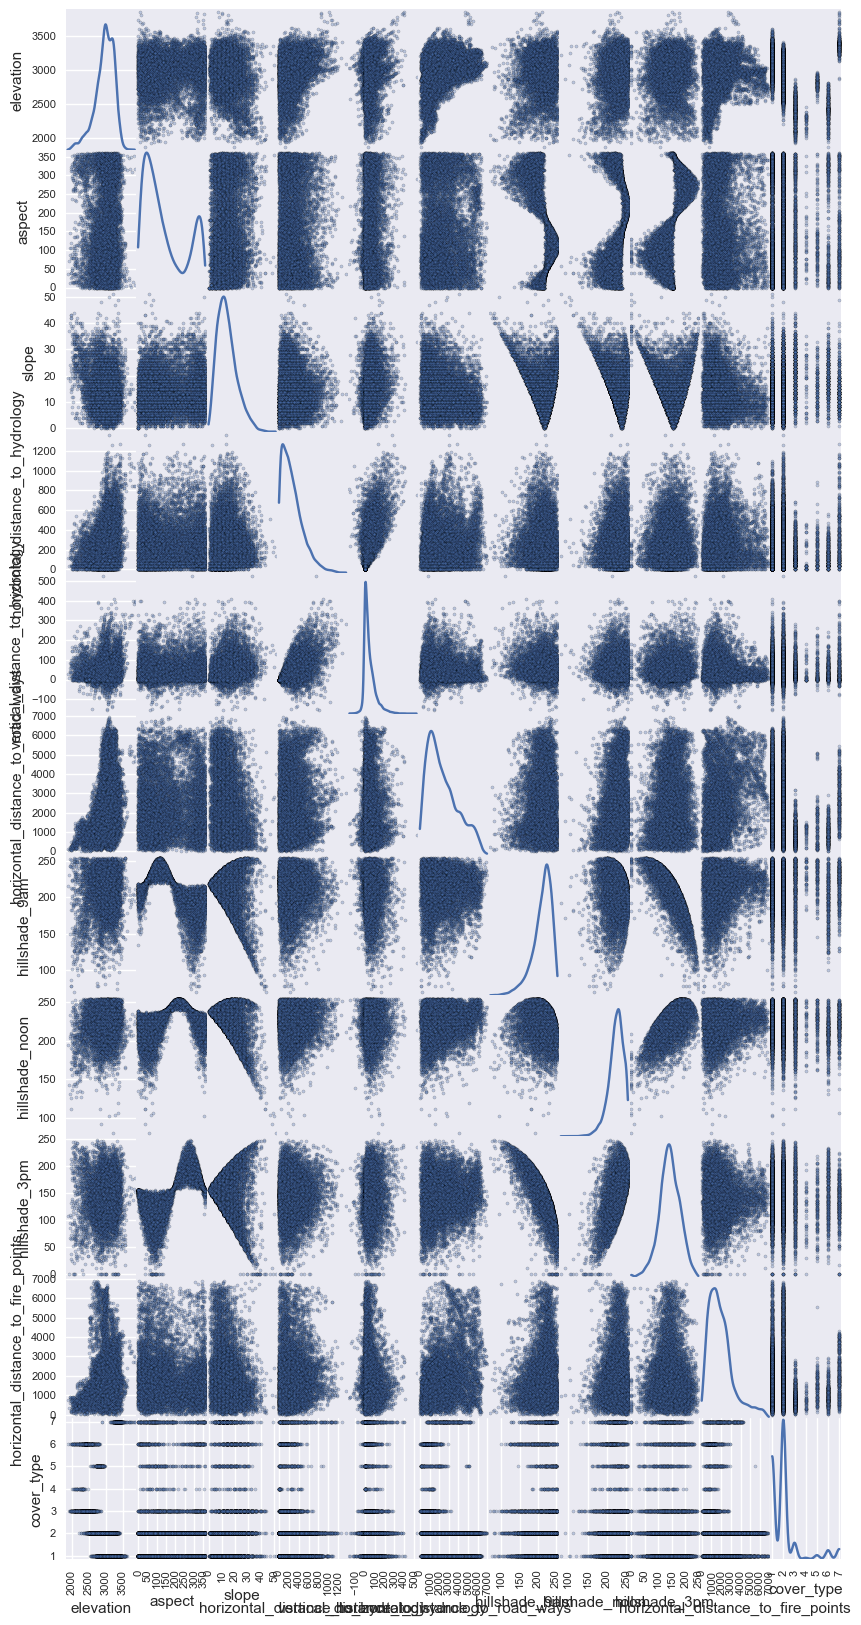

In [26]:
# Leaving out binary variables wilderness_area, soil_type. Since they cannot provide more ifnormation about
# the distributin of the data when comapared to other variables
X_new = data[['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 'vertical_distance_to_hydrology',
                'horizontal_distance_to_road_ways', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
                'horizontal_distance_to_fire_points', 'cover_type']]

_ = pd.scatter_matrix(X_new.sample(n=10000), alpha = 0.3, figsize = (10,20), diagonal = 'kde')

### Examining the scatter plots in detail
Examining above scatter plot many interesting relationships can be observed between the categorical attributes. 
However the figure is not big enough to show all relationships clearly. The folowing figure try to show them 
in detail and one plot at a time. 

#### Reference: 
1. http://stackoverflow.com/questions/22943894/class-labels-in-pandas-scattermatrix
2. http://seaborn.pydata.org/examples/scatterplot_matrix.html

### aspect vs hillshade_
These attributes have higher correlation(already calculated in section 2.1) with score of
* aspect and hillshade_3pm = 0.65
* aspect and hillshade_9am = -0.58

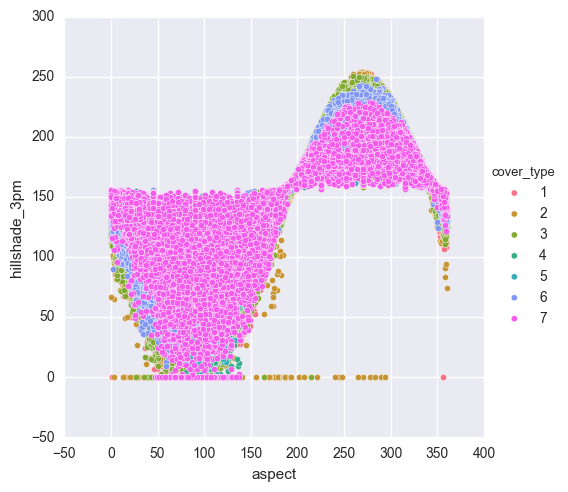

In [43]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "aspect", y_vars = "hillshade_3pm")
plt.show()

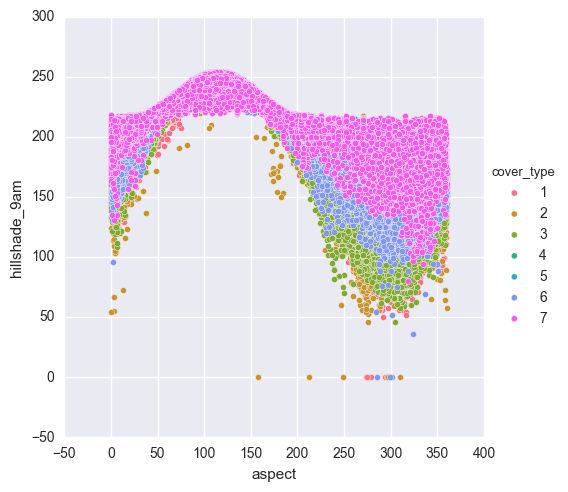

In [44]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "aspect", y_vars = "hillshade_9am")
plt.show()

Above two plot shows a sigmoid realtion(a visible 'S' curve) between the attributes 'aspect' and 'hillshade_3pm',
and also between the variables 'aspect' and 'hillshade_9am'. 

#### Reference
1. https://en.wikipedia.org/wiki/Sigmoid_function

### hillshade\_ vs hillshade\_
These attributes have higher correlation(already calculated in section 2.1) with score of
* hillshade_9am and hillshade_3pm = -0.78
* hillshade_noon and hillshade_3pm = 0.59

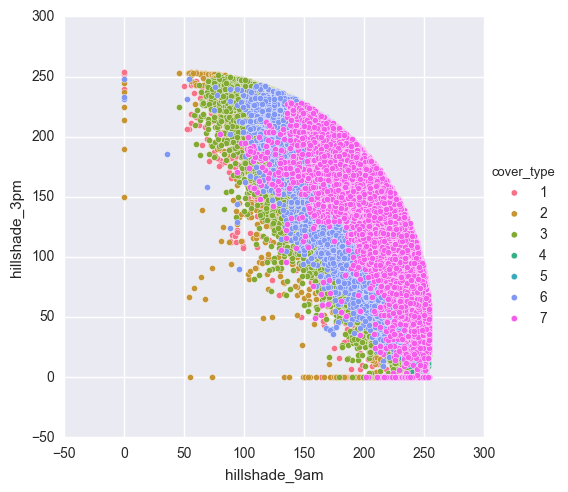

In [45]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "hillshade_9am", y_vars = "hillshade_3pm")
plt.show()

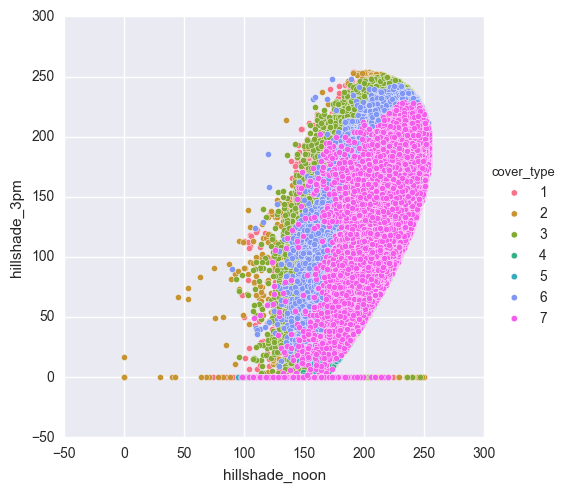

In [46]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "hillshade_noon", y_vars = "hillshade_3pm")
plt.show()

Above two plot shows a elliptic realtion between the attributes 'hillshade_noon' and 'hillshade_3pm',
and also between the variables 'hillshade_9am' and 'hillshade_3pm'. This relationship is obvious, since 
the hill's shade depends upon sun light. The Sun light is recevied by Earth undergoing elliptical orbit,
so all shade will be elliptical upto a degree.

#### References
A book titled 'A Mathematical Nature Walk' and in page number 58, Question 34 discusses 
ways to evaluate a height of a tree based upon the "elliptic" shadows. The mathematical 

### horizontal\_distance\_to\_hydrology vs vertical\_distance\_to\_hydrology
These attributes have higher correlation(already calculated in section 2.1) with score of
* horizontal_distance_to_hydrology and vertical_distance_to_hydrology = 0.61

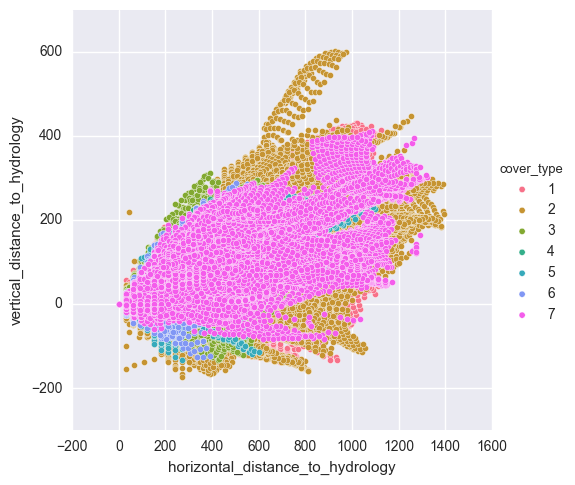

In [47]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "horizontal_distance_to_hydrology", y_vars = "vertical_distance_to_hydrology")
plt.show()

Above plot depicts a strong linear patter between attributes 'vertical_distance_to_hydrology' and 
'horizontal_distance_to_hydrology'. 

## Other interesting relationships observed among attributes 
### slope and hillshade\_noon
These attributes have higher correlation(already calculated in section 2.1) with score of
* slope and hillshade_noon = -0.53

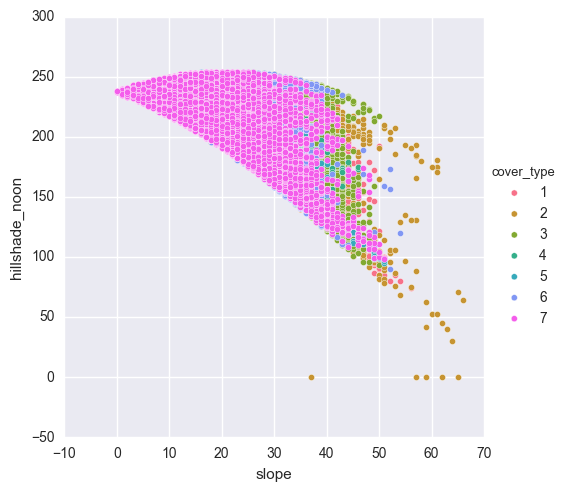

In [48]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "slope", y_vars = "hillshade_noon")
plt.show()

#### elevation vs horizontal_distance_to_road_ways

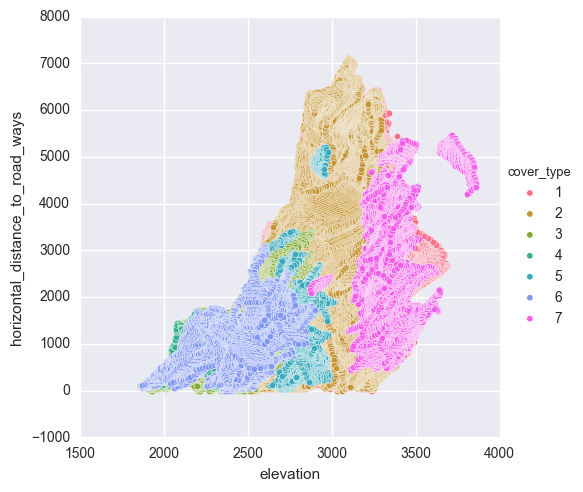

In [50]:
sns.pairplot(data, hue="cover_type", size=5, x_vars = "elevation", y_vars = "horizontal_distance_to_road_ways")
plt.show()

### Examining the distribution among the attributes (sampled)

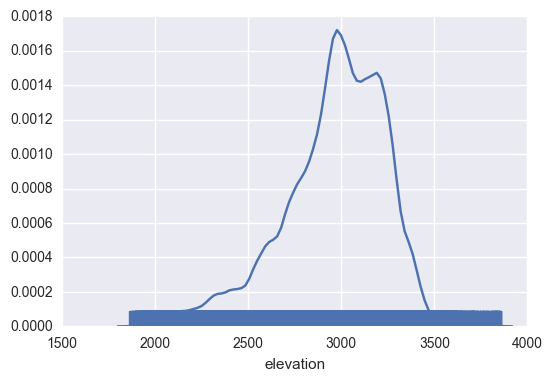

In [64]:
sns.distplot(data['elevation'].sample(n=500000), hist=False, rug=True);
plt.show()

Attribute 'elevation' looks like a normal dirstribution with a single peak with another local peak.

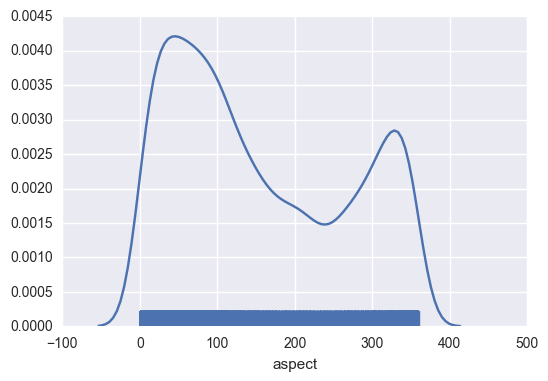

In [8]:
sns.distplot(data['aspect'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'aspect' contains atleast two normal distributions. 

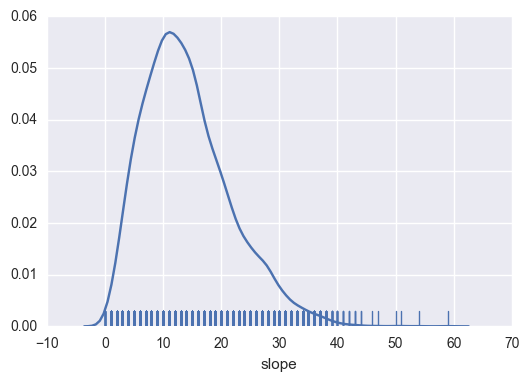

In [54]:
sns.distplot(data['slope'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'slope' looks like a normal dirstribution.

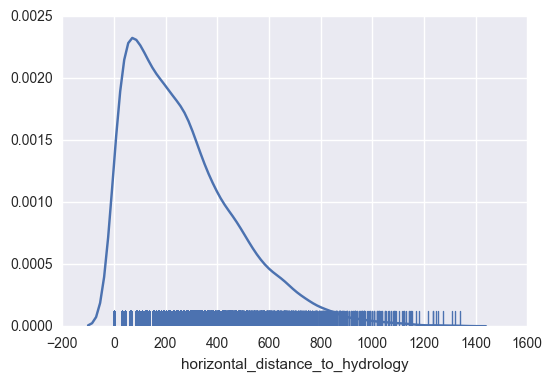

In [55]:
sns.distplot(data['horizontal_distance_to_hydrology'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'horizontal_distance_to_hydrology' looks like a normal dirstribution.

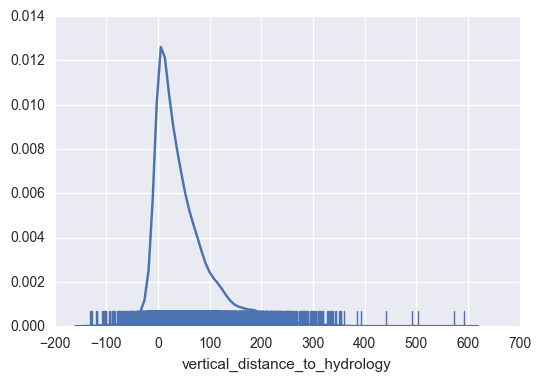

In [56]:
sns.distplot(data['vertical_distance_to_hydrology'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'vertical_distance_to_hydrology' looks like a normal dirstribution. Interestingly the distribution is peaked aroud value 0.

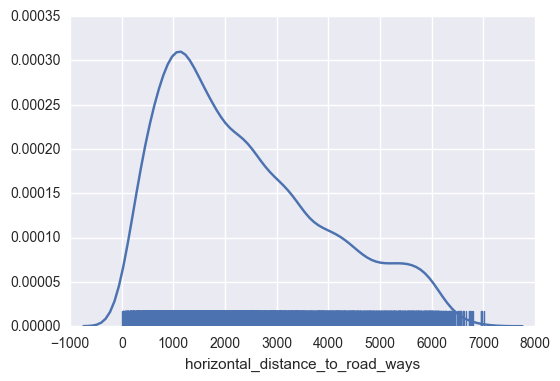

In [57]:
sns.distplot(data['horizontal_distance_to_road_ways'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'horizontal_distance_to_road_ways' looks like a normal dirstribution.

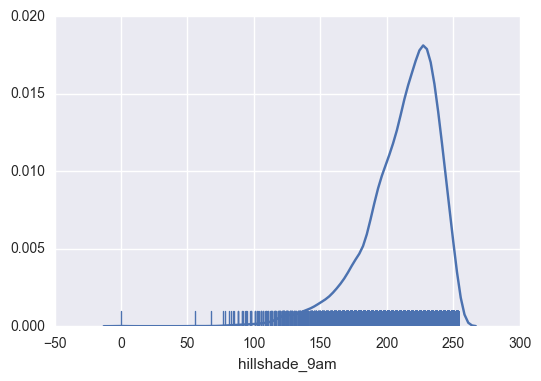

In [58]:
sns.distplot(data['hillshade_9am'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'hillshade_9am' looks like a left-skewed normal dirstribution.

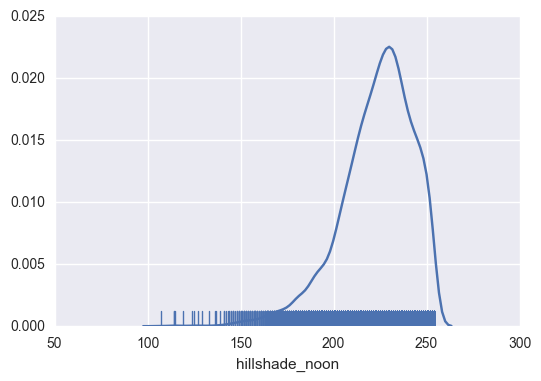

In [59]:
sns.distplot(data['hillshade_noon'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'hillshade_noon' looks like a left-skewed normal dirstribution.

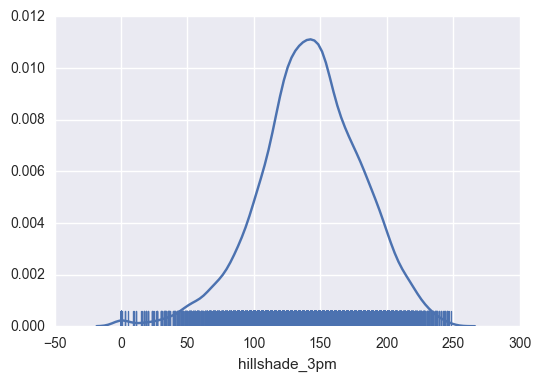

In [60]:
sns.distplot(data['hillshade_3pm'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'hillshade_3pm' looks like a normal dirstribution.

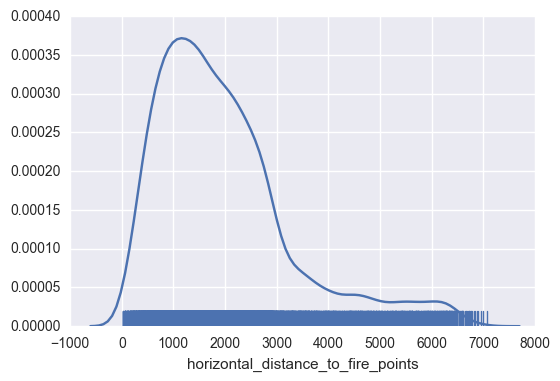

In [61]:
sns.distplot(data['horizontal_distance_to_fire_points'].sample(n=10000), hist=False, rug=True);
plt.show()

Attribute 'horizontal_distance_to_fire_points' looks like a normal dirstribution.

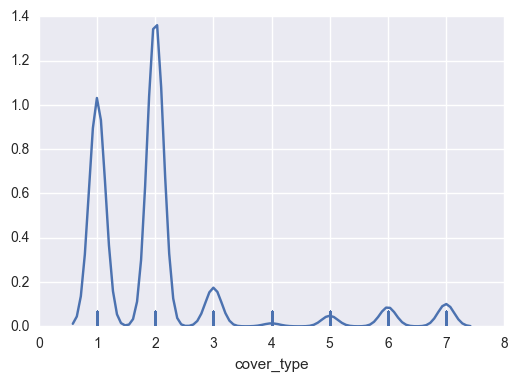

In [63]:
sns.distplot(data['cover_type'].sample(n=100000), hist=False, rug=True);
plt.show()

The above 'cover_type' is a target variable. So this is not considered for the discussion about distribution. It still shows the distribution of the results from 1 to 7. 

## Observation made so far from statistical and graphical data analysis
* Input features consists of 54 columns of mixed data: categorical and binary
* Output target feature is multivalued
* There are no missing values in the data
* No outliers are found in the data. (Inter-Quartile-Range IQR was used)
* Need for rescaling of variables has to be analysed
* Correlation among variables was identified

## 1.3 Algorithms and Techniques
The target variable consists of values from 1 to 7. This implies our classifer must be a **multiclass** classifier. 
Some well known algorithms are listed below. We run those algorithms against the data and can pick the best peforming algorithm then fine tune it for further analysis and improving the accuracy.

1. Linear SVC
2. SVC with sigmoid kernel
2. SGDClassifier
3. K-Neighbours Classifier
4. RandomForestClassifier
5. XGBClassifier

#### Reference
https://en.wikipedia.org/wiki/Multiclass_classification



### Evaluation method
We can evaluate the performance of the above classifiers by measuring their precision, recall, and accuracy score. 
Here Precision measures the percentage of true positive among true positive and false positive,
while Recall measures the percentage of true positive among true positive and false negative, 
while Accuracy measures the percentage of true positive and true negative among true postive, true negative, false positive and false negative. 

Finally, we prefer using the classifier which has the highest scores, for any future forest cover type predictions. 

#### References
https://en.wikipedia.org/wiki/Precision_and_recall


https://en.wikipedia.org/wiki/F1_score

In [5]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import xgboost as xgb
import time

In [6]:
# Preparing the training and the test data

def shuffle_data(X, y):
    '''
    This method divodes the data into test and training set.
    The training set consists of 80% of the total data.
    The test set consists of 20% of the total data.
    '''
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.8, random_state=42)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = shuffle_data(X_all, y_all)
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])

# Scaling all the attributes 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tfm = scaler.transform(X_train)
X_test_tfm = scaler.transform(X_test)

Training set: 464809 samples
Test set: 116203 samples


In [ ]:
clf_list = [LinearSVC(),
            SGDClassifier(n_jobs=-1),
            KNeighborsClassifier(n_jobs=-1), 
            RandomForestClassifier(n_jobs=-1),
            xgb.XGBClassifier(nthread=-1),
            svm.SVC(kernel='sigmoid'), # It was running for ling time like hours, so I decided not to fine tune it, "Curse of dimensionality" at its best
            svm.SVC(kernel='rbf') # It was running for ling time like hours, so I decided not to fine tune it]

# the following code calculates some basic mean accuracy scores of chosen classifiers. 

for clf in clf_list:
    clf.fit(X_train, y_train)
    print clf.score(X_test, y_test)

0.323408173627
0.489987349724
0.968701324406
0.943142603891
0.744025541509


### Observation results
From the predicted values of the classifiers we have calculated the mean accuracy. They are listed above, From those list, three classifiers have very high accuracy: KNeighborsClassifier(mean accuracy ~ 0.966997409705), RandomForestClassifier(mean accuracy ~ 0.942712322401), and XGBClassifier(mean accuracy ~ 0.744025541509). We select these three for further fine tuning. 

### KNeighborsClassifier

Finds n_neighbors nearest to a data point and base upon the neighbors class assigned, the most common class among the neighbors is chosen as the class for the data point. In the following classifier, nearest ten neighbors are considered, and the distance between the neighbr and the data point is measured using 'minkowski distance'. The algorithm is fine tuned to use all cores depending upon the hardware.


#### References 
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

http://scikit-learn.org/stable/modules/neighbors.html#classification


In [9]:
clf_knn = KNeighborsClassifier(n_neighbors=10,
                               weights='uniform',
                               algorithm='auto',
                               leaf_size=10000,
                               p=2,
                               metric='minkowski', 
                               metric_params=None,
                               n_jobs=-1)

# training the classifier
start = time.time()
clf_knn.fit(X_train, y_train)
end = time.time()
time_knn_train = end - start
# predicting the X_test values
start = time.time()
y_predicted = clf_knn.predict(X_test)
end = time.time()
time_knn_test = end - start
# testing the classifier using the cross validation score
print "Results for KNeighborsClassifier - on unscaled data:"
print metrics.classification_report(y_test, y_predicted)
print metrics.accuracy_score(y_test ,y_predicted)

# Scaled Values sccuracy results
# Fitting
start = time.time()
clf_knn.fit(X_train_tfm ,y_train)
end = time.time()
time_knn_tfm_train = end - start
# predicting
start = time.time()
y_predicted_knn = clf_knn.predict(X_test_tfm)
end = time.time()
time_knn_tfm_test = end - start
# Cross validation evaluation results and mean accuravcy score
print "Results for KNeighborsClassifier - on scaled data:"
print metrics.classification_report(y_test, y_predicted_knn)
print metrics.accuracy_score(y_test, y_predicted_knn)

Results for KNeighborsClassifier - on unscaled data:
             precision    recall  f1-score   support

          1       0.95      0.97      0.96     42557
          2       0.97      0.97      0.97     56500
          3       0.94      0.96      0.95      7121
          4       0.94      0.71      0.81       526
          5       0.92      0.84      0.88      1995
          6       0.94      0.89      0.92      3489
          7       0.99      0.95      0.97      4015

avg / total       0.96      0.96      0.96    116203

0.961154187069
Results for KNeighborsClassifier - on scaled data:
             precision    recall  f1-score   support

          1       0.92      0.92      0.92     42557
          2       0.93      0.93      0.93     56500
          3       0.88      0.91      0.89      7121
          4       0.85      0.67      0.75       526
          5       0.85      0.69      0.76      1995
          6       0.81      0.75      0.78      3489
          7       0.94      0

In [10]:
# Running Time
print "Running time in seconds"
print "For unscaled data,"
print "train data : ", float(time_knn_train)
print "test data  : ", float(time_knn_test)
print "For scaled data,"
print "train data : ", float(time_knn_tfm_train)
print "test data  :", float(time_knn_tfm_test)

Running time in seconds
For unscaled data,
train data :  3.26703596115
test data  :  156.397357941
For scaled data,
train data :  1432.91297817
test data  : 1832.3115139


#### Results

Above resulsts confirm that KNeighborsClassifier is performing at the highest efficiency possible. Changing the n_neighbors did not have any effect. Even with the unscaled data, KNeighbors Classifier has achieved 0.96 accuracy score.  

### RandomForestClassifier

Random Forests belong to a class of algorithms derived fro randomized decision trees. 

##### Quoted from scikit learn webpage(see references):

"In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model."

The RandomForestClassifier is also fine tuned to use all cores in the hardware.

#### References

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/ensemble.html#forest

In [11]:
clf_rfc = RandomForestClassifier(n_estimators=500, # Increased the values - 
                                 criterion='gini',
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_features='auto', 
                                 max_leaf_nodes=None,
                                 min_impurity_split=1e-07,
                                 bootstrap=True,
                                 oob_score=False,
                                 n_jobs=-1,
                                 random_state=42,
                                 verbose=0,
                                 warm_start=False,
                                 class_weight=None)

# training the classifier
start = time.time()
clf_rfc.fit(X_train, y_train)
end = time.time()
time_rfc_train = end - start 
# testing the classifier and printing its mean accuracy
# print clf_rfc.score(X_test, y_test)
start = time.time()
y_predicted_rfc = clf_rfc.predict(X_test)
end = time.time()
time_rfc_test = end - start
# testing the classifier using the cross validation score
# print (cross_val_score(clf_rfc, X_test, y_test)) 
print "Results for RandomForestClassifier - on unscaled data:"
print metrics.classification_report(y_test, y_predicted_rfc)
print metrics.accuracy_score(y_test ,y_predicted_rfc)

# Scaled Values sccuracy results
# Fitting
start = time.time()
clf_rfc.fit(X_train_tfm ,y_train)
end = time.time()
time_rfc_tfm_train = end - start

start = time.time()
y_predicted_rfc_tfm = clf_rfc.predict(X_test_tfm)
end = time.time()
time_rfc_tfm_test = end - start
# Cross validation eval
print "Results for RandomForestClassifier - on scaled data:"
print metrics.classification_report(y_test, y_predicted_rfc_tfm)
print metrics.accuracy_score(y_test, y_predicted_rfc_tfm)

Results for RandomForestClassifier - on unscaled data:
             precision    recall  f1-score   support

          1       0.97      0.94      0.96     42557
          2       0.95      0.97      0.96     56500
          3       0.95      0.97      0.96      7121
          4       0.92      0.85      0.88       526
          5       0.94      0.77      0.85      1995
          6       0.94      0.90      0.92      3489
          7       0.97      0.95      0.96      4015

avg / total       0.96      0.96      0.96    116203

0.955982203558
Results for RandomForestClassifier - on scaled data:
             precision    recall  f1-score   support

          1       0.97      0.94      0.96     42557
          2       0.95      0.98      0.96     56500
          3       0.95      0.97      0.96      7121
          4       0.92      0.84      0.88       526
          5       0.94      0.78      0.85      1995
          6       0.93      0.91      0.92      3489
          7       0.97   

In [8]:
# Running Time in seconds
print "Running time for RandomForestClassifier:"
print "For unscaled data,"
print "train data : ", float(time_rfc_train)
print "test data  : ", float(time_rfc_test)
print "For scaled data,"
print "train data : ", float(time_rfc_tfm_train)
print "test data  :", float(time_rfc_tfm_test)

Running time for RandomForestClassifier:
For unscaled data,
train data :  172.204415083
test data  :  7.09427499771
For scaled data,
train data :  185.074743032
test data  : 7.15944194794


#### Result
RandomForestClassifier works at the highest efficiency here. Increasing the n_estimators, changes the accuracy score slightly(by ~0.01). It performs well in both scaled and unscaled data versions. 

### XGBClassifier

XGBClassifier belongs to the boosted version of Gradient Boosting classifiers. This is obtained as a pip package from github(see reference). This classifier is built upon the concept of 'Gradient Boosting'. 

##### Quoted from Wikipedia(see references)

"Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function."

The XGBClassifier is also fine tuned to use all cores in the hardware.

#### References
https://github.com/dmlc/xgboost/blob/master/python-package/xgboost/sklearn.py

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://en.wikipedia.org/wiki/Gradient_boosting

In [12]:
# Train and predict using the XGBoost algorithm
clf_xgbc = xgb.XGBClassifier(max_depth=50,
                             n_estimators=500,
                             silent=True,
                             objective="multi:softmax",
                             nthread=-1,
                             gamma=0,
                             min_child_weight=1,
                             max_delta_step=0,
                             subsample=1,
                             colsample_bytree=0.3,
                             colsample_bylevel=1,
                             reg_alpha=0,
                             reg_lambda=1,
                             scale_pos_weight=1,
                             seed=0, 
                             base_score=0.5,
                             missing=None)

# Fitting
start = time.time()
clf_xgbc.fit(X_train ,y_train)
end = time.time()
time_xgbc_train = end - start

start = time.time()
y_predicted_xgbc = clf_xgbc.predict(X_test)
end = time.time()
time_xgbc_test = end - start
# Cross validation eval
print "Results for XGBClassifier - on unscaled data:"
print metrics.classification_report(y_test, y_predicted_xgbc)
print metrics.accuracy_score(y_test ,y_predicted_xgbc)

# Fitting
start = time.time()
clf_xgbc.fit(X_train_tfm ,y_train)
end = time.time()
time_xgbc_tfm_train = end - start

start = time.time()
y_predicted_xgbc_tfm = clf_xgbc.predict(X_test_tfm)
end = time.time()
time_xgbc_tfm_test = end - start
# Cross validation eval
print "Results for XGBClassifier - on scaled data:"
print metrics.classification_report(y_test, y_predicted_xgbc_tfm)
print metrics.accuracy_score(y_test ,y_predicted_xgbc_tfm)

Results for XGBClassifier - on unscaled data:
             precision    recall  f1-score   support

          1       0.97      0.95      0.96     42557
          2       0.95      0.98      0.96     56500
          3       0.95      0.97      0.96      7121
          4       0.92      0.84      0.88       526
          5       0.96      0.78      0.86      1995
          6       0.95      0.91      0.93      3489
          7       0.98      0.95      0.97      4015

avg / total       0.96      0.96      0.96    116203

0.95894254021
Results for XGBClassifier - on scaled data:
             precision    recall  f1-score   support

          1       0.97      0.95      0.96     42557
          2       0.95      0.98      0.96     56500
          3       0.95      0.97      0.96      7121
          4       0.92      0.84      0.88       526
          5       0.96      0.78      0.86      1995
          6       0.95      0.91      0.93      3489
          7       0.98      0.95      0.97  

In [13]:
# Running Time in minutes
print "Running time for XGBClassifier:"
print "For unscaled data,"
print "train data : ", float(time_xgbc_train)/60.0
print "test data  : ", float(time_xgbc_test)/60.0
print "For scaled data,"
print "train data : ", float(time_xgbc_tfm_train)/60.0
print "test data  :", float(time_xgbc_tfm_test)/60.0

Running time for XGBClassifier:
For unscaled data,
train data :  41.1902084192
test data  :  0.482733766238
For scaled data,
train data :  40.6572913011
test data  : 0.480387802919


#### Results
XGBClassifier performs with high accuracy after fine tuning. An increase in accuracy score of approximately 0.24 value is observed.

### Plotting training and testing running time of all classifiers

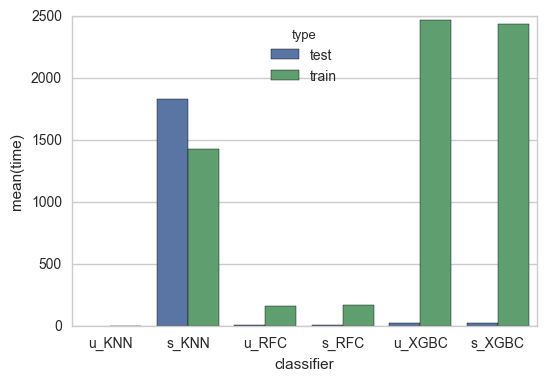

In [16]:
# Plotting the running time of all three classifiers 
time_plot_data = [
    {"classifier":"u_KNN", "time:":time_knn_test, "type":"test"},
    {"classifier":"u_KNN", "time":time_knn_train, "type":"train"},
    {"classifier":"s_KNN", "time":time_knn_tfm_test, "type":"test"},
    {"classifier":"s_KNN", "time":time_knn_tfm_train, "type":"train"},
    {"classifier":"u_RFC", "time":time_rfc_test, "type":"test"},
    {"classifier":"u_RFC", "time":time_rfc_train, "type":"train"},
    {"classifier":"s_RFC", "time":time_rfc_tfm_test, "type":"test"},
    {"classifier":"s_RFC", "time":time_rfc_tfm_train, "type":"train"},
    {"classifier":"u_XGBC", "time":time_xgbc_test, "type":"test"},
    {"classifier":"u_XGBC", "time":time_xgbc_train, "type":"train"},
    {"classifier":"s_XGBC", "time":time_xgbc_tfm_test, "type":"test"},
    {"classifier":"s_XGBC", "time":time_xgbc_tfm_train, "type":"train"}
]

sns.set_style("whitegrid")
sns_time_plot_data = pd.DataFrame(time_plot_data)
ax = sns.barplot(x="classifier", y="time", hue="type", data=sns_time_plot_data)
plt.show()

## 1.4 Results Comparison - All classifiers

From the above three classifiers, we can notice that after fine tuning, XGBClassifier performance is incresed by a huge margin. Also an accuracy increase from ~0.74 to ~0.94 is observed. Also our initital plan to achieve an accuracy of above 90% is also achieved here. However, **RandomForestClassifier** performs consistently better when considered to all other classifiers. It produces an accuracy score of ~0.96 which is the highest obsereved in this project. Also it is the fastest classifier considered in this project. 

** So from the list of classifiers used in this project I would recommend RandomForestClassifier to be used for further analysis in similar type of forest cover identification. Since it has consistent highest accuracy score. **